In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Series Object:

In [14]:
data = pd.Series([0.25,0.3,0.5,0.7],
                index=['a','b','c','d'])#as Numpy array
data

a    0.25
b    0.30
c    0.50
d    0.70
dtype: float64

In [15]:
data['b']

0.29999999999999999

In [5]:
data = pd.Series({2:'b',4:'a',3:'c'})#as dictionary 
data# sorted by index

2    b
3    c
4    a
dtype: object

# Data Frames:

In [9]:
population_dict = {'California':38332521,'Texas':26448193,'New York':19651127,
                   'Florida':19556860,'Ilinois':12882135}

In [10]:
area_dict = {'California':423967,'Texas':695662,'New York':141297,
                   'Florida':170312,'Ilinois':149995}

In [11]:
states = pd.DataFrame({'pop' : pd.Series(population_dict),
                       'area' : pd.Series(area_dict)})
states

,area,pop
California,423967,38332521
Florida,170312,19556860
Ilinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [14]:
states.head(3)

,area,pop
California,423967,38332521
Florida,170312,19556860
Ilinois,149995,12882135


In [15]:
states.tail(3)

,area,pop
Ilinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [16]:
states.sort_values(by='area') # sort by value

,area,pop
New York,141297,19651127
Ilinois,149995,12882135
Florida,170312,19556860
California,423967,38332521
Texas,695662,26448193


In [13]:
pd.DataFrame(np.random.rand(3,2),
            columns = ['foo','bar'],
            index = ['a','b','c'])

,foo,bar
a,0.483274,0.219993
b,0.744559,0.108211
c,0.002180,0.123863


# Index Object:

In [13]:
pd.Index([2,3,5,7])

Int64Index([2, 3, 5, 7], dtype='int64')

In [23]:
data = pd.Series([0.25,0.3,0.5,0.7],
                index=['a','b','c','d'])#as Numpy array
data

a    0.25
b    0.30
c    0.50
d    0.70
dtype: float64

In [24]:
data['a':'b']

a    0.25
b    0.30
dtype: float64

# loc, iloc:

In [29]:
data = pd.Series(['a','b','c','d'],index=[1,2,3,4])
data

1    a
2    b
3    c
4    d
dtype: object

In [33]:
data.loc[1:3]

1    a
2    b
3    c
dtype: object

In [34]:
data.iloc[1:3]

2    b
3    c
dtype: object

In [71]:
states['area']# dictionary-style

California    423967
Florida       170312
Ilinois       149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [72]:
states.area # attribute-style

California    423967
Florida       170312
Ilinois       149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [73]:
states.iloc[:2,:]

,area,pop
California,423967,38332521
Florida,170312,19556860


In [74]:
states['density'] = states['pop'] / states['area']
states

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19556860,114.829607
Ilinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


In [75]:
states.loc[states.density > 100,['pop','area']]


,pop,area
Florida,19556860,170312
New York,19651127,141297


# Missing data:

In [34]:
data = pd.DataFrame([[1,2,5],
                 [3,np.nan,3],
                 [np.nan,np.nan,5]])
data

,0,1,2
0,1.0,2.0,5
1,3.0,NaN,3
2,NaN,NaN,5


In [35]:
data.isnull()

,0,1,2
0,False,False,False
1,False,True,False
2,True,True,False


In [36]:
data.dropna()

,0,1,2
0,1.0,2.0,5


In [37]:
data.dropna(how = 'all')

,0,1,2
0,1.0,2.0,5
1,3.0,NaN,3
2,NaN,NaN,5


In [38]:
data.dropna(thresh=2)

,0,1,2
0,1.0,2.0,5
1,3.0,NaN,3


In [39]:
data.fillna(method='bfill',axis = 1)#ffill

,0,1,2
0,1.0,2.0,5.0
1,3.0,3.0,3.0
2,5.0,5.0,5.0


# Multiindex:

In [112]:
index = pd.MultiIndex.from_product([[2013,2014],[1,2]],
                                  names = ['year','visit'])
columns = pd.MultiIndex.from_product([['Bob','Guido','Sue'],['HR','Temp']],
                                    names = ['subject','type'])
data = np.round(np.random.randn(4,6),1)
data[:,::2] *= 18
data += 37

In [113]:
health_data = pd.DataFrame(data,index=index,columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      53.2  36.7  28.0  36.6  31.6  37.1
     2      47.8  36.5  60.4  36.1  53.2  37.4
2014 1      24.4  35.6  58.6  38.9  13.6  37.3
     2      40.6  37.8  26.2  36.1  53.2  35.9

In [114]:
health_data['Guido','HR']

year  visit
2013  1        28.0
      2        60.4
2014  1        58.6
      2        26.2
Name: (Guido, HR), dtype: float64

In [118]:
idx = pd.IndexSlice
health_data.loc[idx[:,1],idx[:,'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,53.2,28.0,31.6
2014,1,24.4,58.6,13.6


In [177]:
health_data.loc[[2013],idx[:,'HR']].unstack(level = 0)

subject,Bob,Guido,Sue
type,HR,HR,HR
year,2013,2013,2013
visit,,,
1,53.2,28.0,31.6
2,47.8,60.4,53.2


In [136]:
data_mean = health_data.mean(level = 'year')
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     50.5  36.6  44.2  36.35  42.4  37.25
2014     32.5  36.7  42.4  37.50  33.4  36.60

In [137]:
data_mean.mean(axis=1,level='type')

type,HR,Temp
year,,
2013,45.7,36.733333
2014,36.1,36.933333


# Concatenation:

In [158]:
df1 = pd.DataFrame(np.random.random((2,2)),columns=['A','B'],index=[1,2])
df2 = pd.DataFrame(np.random.random((2,2)),columns=['C','D'],index=[1,2])
df2

,C,D
1,0.826640,0.278993
2,0.055874,0.295126


In [159]:
pd.concat([df1,df2],axis=1)

,A,B,C,D
1,0.203671,0.762857,0.826640,0.278993
2,0.437017,0.870913,0.055874,0.295126


In [160]:
df3 = pd.DataFrame(np.random.random((2,2)),columns=['A','B'],index=[1,2])

In [164]:
pd.concat([df1,df3],ignore_index=True)

,A,B
0,0.203671,0.762857
1,0.437017,0.870913
2,0.294337,0.421405
3,0.117174,0.009998


In [167]:
pd.concat([df1,df3],keys=['x','y'],names=['flag','index'])

A         B
flag index                    
x    1      0.203671  0.762857
     2      0.437017  0.870913
y    1      0.294337  0.421405
     2      0.117174  0.009998

In [171]:
df1.append(df3)

,A,B
1,0.203671,0.762857
2,0.437017,0.870913
1,0.294337,0.421405
2,0.117174,0.009998


# Join:

In [225]:
df1 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'],
                   'group':['Accounting','Engineering','Engineering','HR']},
                  columns = ['employee','group'])
df2 = pd.DataFrame({'name' : ['Lisa','Jake','Bob','Sue'],
                   'salary':[7000,8000,5000,4000]},
                  columns = ['name','salary'])
df1.set_index('employee')
df2.set_index('name')
print(df1);print(df2);

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0  Lisa    7000
1  Jake    8000
2   Bob    5000
3   Sue    4000


In [226]:
pd.merge(df1,df2,left_on='employee',right_on='name',how='inner',left_index=True).drop('employee',axis = 1)

,group,name,salary
2,Accounting,Bob,5000
1,Engineering,Jake,8000
0,Engineering,Lisa,7000
3,HR,Sue,4000


In [229]:
df3 = pd.DataFrame({'name' : ['Lisa','Jake','Bob','Sue','Mary','Paul'],
                   'salary':[7000,8000,5000,4000,7000,10000]},
                  columns = ['name','salary'])
df3.set_index('name')

,salary
name,
Lisa,7000
Jake,8000
Bob,5000
Sue,4000
Mary,7000
Paul,10000


In [232]:
pd.merge(df1,df3,left_on='employee',right_on='name',how='outer').drop('employee',axis = 1)

,group,name,salary
0,Accounting,Bob,5000
1,Engineering,Jake,8000
2,Engineering,Lisa,7000
3,HR,Sue,4000
4,NaN,Mary,7000
5,NaN,Paul,10000


In [239]:
df4 = pd.DataFrame({'name' : ['Lisa','Jake','Bob','Sue'],
                   'salary':[1000,4000,5000,2000]},
                  columns = ['name','salary'])

In [242]:
pd.merge(df2,df4,on='name',suffixes=['_L','_R'])

,name,salary_L,salary_R
0,Lisa,7000,1000
1,Jake,8000,4000
2,Bob,5000,5000
3,Sue,4000,2000


# Group by

In [3]:
import seaborn as sns

In [18]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [19]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [20]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [320]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [21]:
planets.groupby('method')['year'].describe().unstack()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [22]:
planets.groupby('method')['year'].aggregate(['min',np.median,max])

,min,median,max
method,,,
Astrometry,2010,2011.5,2013
Eclipse Timing Variations,2008,2010.0,2012
Imaging,2004,2009.0,2013
Microlensing,2004,2010.0,2013
Orbital Brightness Modulation,2011,2011.0,2013
Pulsar Timing,1992,1994.0,2011
Pulsation Timing Variations,2007,2007.0,2007
Radial Velocity,1989,2009.0,2014
Transit,2002,2012.0,2014


In [45]:
planets.groupby('method')['year'].apply(lambda x : x.max() - x.min())

method
Astrometry                        3
Eclipse Timing Variations         4
Imaging                           9
Microlensing                      9
Orbital Brightness Modulation     2
Pulsar Timing                    19
Pulsation Timing Variations       0
Radial Velocity                  25
Transit                          12
Transit Timing Variations         3
Name: year, dtype: int64

In [290]:
def filter_func(x):
    return x['year'].median() > 2000

planets.groupby('method').filter(filter_func);

In [23]:
planets.groupby('method')['year'].min()

method
Astrometry                       2010
Eclipse Timing Variations        2008
Imaging                          2004
Microlensing                     2004
Orbital Brightness Modulation    2011
Pulsar Timing                    1992
Pulsation Timing Variations      2007
Radial Velocity                  1989
Transit                          2002
Transit Timing Variations        2011
Name: year, dtype: int64

In [24]:
decade = 10 * (planets['year']//10)
decade = decade.astype(str)+'s'
decade.name = 'decade'
planets.groupby(['method',decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


# Pivot table:

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [7]:
titanic.groupby(['sex','class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [331]:
titanic.pivot_table('survived',index='sex',columns='class',margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [13]:
titanic.groupby('class')['survived'].count()

class
First     216
Second    184
Third     491
Name: survived, dtype: int64

In [37]:
survived_sex = pd.crosstab(index = titanic['survived'],
                           columns = titanic['sex'],
                          margins = True)
survived_sex.index = ['died','survived','coltotal']
survived_sex.columns = ['female','male','rowtotal']
survived_sex

,female,male,rowtotal
died,81,468,549
survived,233,109,342
coltotal,314,577,891


In [39]:
survived_sex / survived_sex.ix['coltotal']

,female,male,rowtotal
died,0.257962,0.811092,0.616162
survived,0.742038,0.188908,0.383838
coltotal,1.000000,1.000000,1.000000


In [40]:
survived_sex / survived_sex.ix['coltotal','rowtotal']

,female,male,rowtotal
died,0.090909,0.525253,0.616162
survived,0.261504,0.122334,0.383838
coltotal,0.352413,0.647587,1.000000


In [22]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [23]:
np.sum(titanic['age'].isnull())

177

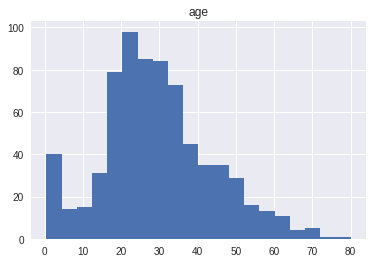

In [21]:
titanic.hist(column='age',bins=20);

In [25]:
new_age = np.where(titanic['age'].isnull(),28,titanic['age'])
titanic['age'] = new_age

In [26]:
titanic['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

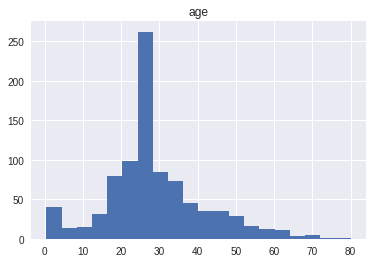

In [28]:
titanic.hist(column = 'age',bins=20);

In [330]:
age = pd.cut(titanic['age'],[0,18,88])
titanic.pivot_table('survived',index=['sex',age],columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 88]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 88]  0.375000  0.071429  0.133663

In [334]:
titanic.pivot_table(index='sex',columns='class',aggfunc={'survived':sum,'fare':'mean'})

survived                     fare                      
class     First Second Third       First     Second      Third
sex                                                           
female       91     70    72  106.125798  21.970121  16.118810
male         45     17    47   67.226127  19.741782  12.661633

# String operations:

In [335]:
monte = pd.Series(['Graham Chapman','John Cleese','Terry Gilliam','Eric Idle'])

In [336]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
dtype: object

In [337]:
monte.str.len()

0    14
1    11
2    13
3     9
dtype: int64

In [338]:
import re

In [348]:
monte.str.findall('([A-Za-z]+)')

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
dtype: object

In [349]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
dtype: object

# Datetime:

In [351]:
date = pd.to_datetime("4th of July,2015")
date

Timestamp('2015-07-04 00:00:00')

In [355]:
dates = date + pd.to_timedelta(np.arange(12),'D')
dates

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

In [356]:
dates - dates[0]

TimedeltaIndex([ '0 days',  '1 days',  '2 days',  '3 days',  '4 days',
                 '5 days',  '6 days',  '7 days',  '8 days',  '9 days',
                '10 days', '11 days'],
               dtype='timedelta64[ns]', freq=None)

In [357]:
pd.date_range('2015-07-03','2015-07-06')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06'], dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4),
                  index = pd.date_range('20130101',periods=6),
                 columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,1.547647,-0.684218,1.204610,-0.413115
2013-01-02,1.167157,-0.396005,-0.353440,2.897058
2013-01-03,1.000144,0.575205,-0.308443,-0.442127
2013-01-04,0.123516,-0.334213,1.024059,-0.291457
2013-01-05,0.094085,-0.522718,-1.234937,-0.660318
2013-01-06,-1.275850,0.513315,-0.119125,-1.244765
